<a href="https://colab.research.google.com/github/samantha-olinsky/MA322-Python/blob/main/CART/DecisionTrees_Classification_Lesson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# as always, import packages we need
import pandas as pd

In [ ]:
# use the seaborn package to load in the iris dataset
import seaborn as sns
iris = sns.load_dataset('iris')

# test by printing
print(iris)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [ ]:
# as you may remember, 
# and as you can see looking at the portion of the data that was printed,
# this dataset is very organized

# in order to more closely mimic the real world,
# we're going to randomly shuffle the data

In [ ]:
# we can use the "sample" method to randomly reorganize the rows
# (which we learned in the KNN lesson)
# The frac keyword asks for the fraction of rows to return, 
# so frac=1 means return all rows (in random order)
rand_iris = iris.sample(frac=1)

# then we print it to take a look
print(rand_iris)

     sepal_length  sepal_width  petal_length  petal_width     species
146           6.3          2.5           5.0          1.9   virginica
139           6.9          3.1           5.4          2.1   virginica
145           6.7          3.0           5.2          2.3   virginica
15            5.7          4.4           1.5          0.4      setosa
20            5.4          3.4           1.7          0.2      setosa
..            ...          ...           ...          ...         ...
97            6.2          2.9           4.3          1.3  versicolor
34            4.9          3.1           1.5          0.2      setosa
141           6.9          3.1           5.1          2.3   virginica
129           7.2          3.0           5.8          1.6   virginica
77            6.7          3.0           5.0          1.7  versicolor

[150 rows x 5 columns]


In [ ]:
# we need to split the data into training and testing datasets and 
# also separate the target feature

# to make things easier, lets separate the target feature first
iris_main = rand_iris[['sepal_length', 'sepal_width','petal_length', 'petal_width']]
iris_tf = rand_iris['species']

# and test by printing
print(iris_main)
print(iris_tf)

     sepal_length  sepal_width  petal_length  petal_width
146           6.3          2.5           5.0          1.9
139           6.9          3.1           5.4          2.1
145           6.7          3.0           5.2          2.3
15            5.7          4.4           1.5          0.4
20            5.4          3.4           1.7          0.2
..            ...          ...           ...          ...
97            6.2          2.9           4.3          1.3
34            4.9          3.1           1.5          0.2
141           6.9          3.1           5.1          2.3
129           7.2          3.0           5.8          1.6
77            6.7          3.0           5.0          1.7

[150 rows x 4 columns]
146     virginica
139     virginica
145     virginica
15         setosa
20         setosa
          ...    
97     versicolor
34         setosa
141     virginica
129     virginica
77     versicolor
Name: species, Length: 150, dtype: object


In [ ]:
# ok now we can make testing and traning datasets
# remember about 80% of data is for training, 20% for testing

iris_train = iris_main.iloc[:120]
iris_test = iris_main.iloc[121:]
iris_train_tf = iris_tf.iloc[:120] 
iris_test_tf = iris_tf.iloc[121:]

In [ ]:
# lets check our work and take a look at a couple of our datasets
print(iris_train)
print(iris_train_tf)

     sepal_length  sepal_width  petal_length  petal_width
146           6.3          2.5           5.0          1.9
139           6.9          3.1           5.4          2.1
145           6.7          3.0           5.2          2.3
15            5.7          4.4           1.5          0.4
20            5.4          3.4           1.7          0.2
..            ...          ...           ...          ...
106           4.9          2.5           4.5          1.7
11            4.8          3.4           1.6          0.2
82            5.8          2.7           3.9          1.2
62            6.0          2.2           4.0          1.0
131           7.9          3.8           6.4          2.0

[120 rows x 4 columns]
146     virginica
139     virginica
145     virginica
15         setosa
20         setosa
          ...    
106     virginica
11         setosa
82     versicolor
62     versicolor
131     virginica
Name: species, Length: 120, dtype: object


In [ ]:
# great! now were ready to build the classification decision tree
# these are the packages we'll use to build it
from sklearn import tree

# create the decision tree classifer object,
# and fit it with the training data
iris_tree = tree.DecisionTreeClassifier(criterion="entropy", max_depth=2).fit(iris_train,iris_train_tf)

## In terms of what maximum depth is and how to choose that at the pre-runing step of the decition tree go to
## https://towardsdatascience.com/understanding-decision-trees-for-classification-python-9663d683c952
## however, for the students, it might be best 

In [ ]:
# lets visualize our classification tree
# we need a bunch more packages
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


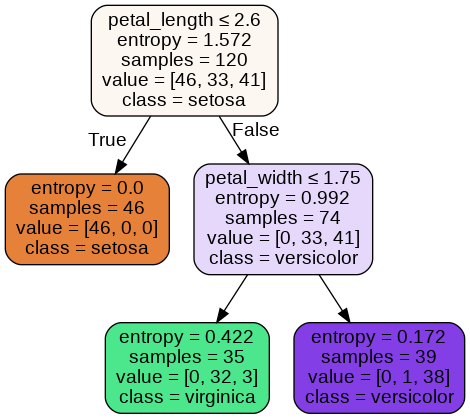

In [ ]:
# to create the visual
dot_data = StringIO()
export_graphviz(iris_tree, out_file=dot_data,  
                filled=True, rounded=True, special_characters=True, 
                feature_names = ['sepal_length','sepal_width','petal_length','petal_width'], 
                class_names=['setosa','virginica','versicolor'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


In [ ]:
# for determining the number of leaves
iris_tree.get_n_leaves()

3

In [ ]:
# using the tree object to make predictions for the testing dataset
from sklearn import metrics
predictions = iris_tree.predict(iris_test)

# make a confusion matrix to view accuarcy
cm = metrics.confusion_matrix(iris_test_tf, predictions, labels=['setosa', 'versicolor', 'virginica'])
print(cm)

# adding labels to the confusion matrix
cm_wlabel = pd.DataFrame(
    metrics.confusion_matrix(iris_test_tf, predictions, labels=['setosa', 'versicolor', 'virginica']), 
    index=['true:setosa', 'true:versicolor', 'true:virginica'], 
    columns=['pred:setosa', 'pred:versicolor', 'pred:virginica']
) # dont forget to close the pd.DataFrame parentheses
print(cm_wlabel)

[[ 6  0  0]
 [ 0 12  1]
 [ 0  3  7]]
                 pred:setosa  pred:versicolor  pred:virginica
true:setosa                6                0               0
true:versicolor            0               12               1
true:virginica             0                3               7


In [ ]:
# we can also calculate the accuracy score
accuracy = metrics.accuracy_score(iris_test_tf, predictions)
print(accuracy)

0.8620689655172413
